In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv('coffee_yield_dataset_2010_2022.csv')
df.head()

,Region,Year,Area_ha,Trees_total,Trees_in_production,Rainfall_mm,Avg_Temperature_C,NDVI_mean,Estimated_National_Production_tons,Yield_kg_per_ha
0,Central,2010,136247,151082141,109993307,1239.7,23.44,0.743,315230.3,853.8
1,Western,2010,79773,94155423,61342735,1081.3,23.13,0.715,295305.3,791.7
2,Eastern,2010,77709,86332784,73305543,962.9,24.31,0.715,280867.2,821.8
3,Northern,2010,19886,27498178,20519580,855.0,25.59,0.676,290919.8,947.0
4,South-West,2010,40292,49549569,29430081,1417.3,21.41,0.751,285752.5,689.2


In [4]:
# Feature selection
features = ['Area_ha','Trees_total','Trees_in_production','Rainfall_mm','Avg_Temperature_C','NDVI_mean']
X = df[features]
y = df['Yield_kg_per_ha']

In [5]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression: RMSE=55.80, MAE=45.97, R2=0.66
Random Forest: RMSE=49.49, MAE=40.46, R2=0.74


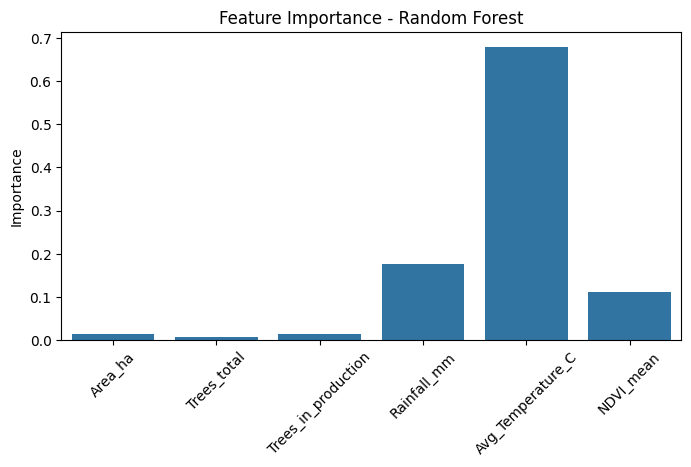

XGBoost: RMSE=63.21, MAE=53.03, R2=0.57


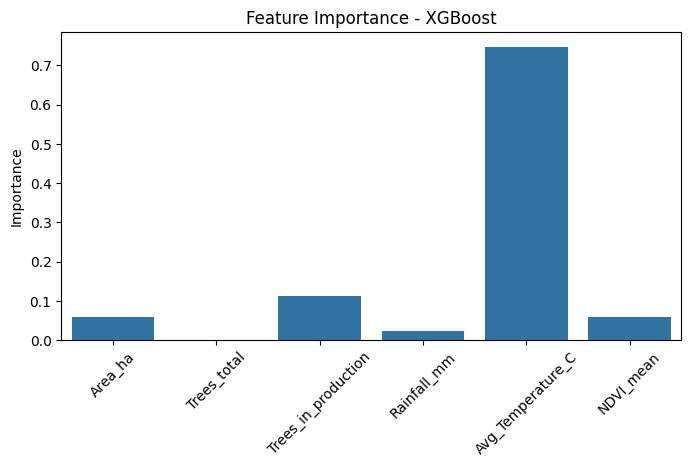

In [7]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=200, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, verbosity=0)
}

results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate - RMSE compatible with older sklearn versions
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}
    
    print(f'{name}: RMSE={rmse:.2f}, MAE={mae:.2f}, R2={r2:.2f}')
    
    # Feature importance for tree-based models
    if name in ['Random Forest', 'XGBoost']:
        plt.figure(figsize=(8,4))
        importances = model.feature_importances_
        sns.barplot(x=features, y=importances)
        plt.title(f'Feature Importance - {name}')
        plt.xticks(rotation=45)
        plt.ylabel("Importance")
        plt.show()


In [8]:
# Save predictions
for name, model in models.items():
    df[f'Predicted_{name.replace(" ", "_")}'] = model.predict(df[features])
df.to_csv('coffee_yield_predictions_2010_2022.csv', index=False)